<H1>SEO ANALYSIS</H1>

In [ ]:
import requests
import pandas as pd
from collections import Counter
from textblob import TextBlob
import re

# Your Google API Key and Custom Search Engine ID


# Query to search
query = "best smartphones 2025"

# URL to make the API request
url = f"https://www.googleapis.com/customsearch/v1?q={query}&key={API_KEY}&cx={SEARCH_ENGINE_ID}"

# Initialize an empty list to store results
results = []

# Number of results to fetch (up to 95)
max_results = 95

# Loop to handle pagination (10 results per page)
for start_index in range(1, max_results + 1, 10):  # Start index is 1, 11, 21, etc.
    response = requests.get(url, params={"start": start_index})
    data = response.json()
    
    # Extract relevant information from the API response
    for idx, item in enumerate(data.get("items", [])):
        rank = start_index + idx
        title = item.get("title", "")
        link = item.get("link", "")
        description = item.get("snippet", "No description available")
        
        # Append the result to the list
        results.append({
            "Rank": rank,
            "Title": title,
            "URL": link,
            "Description": description
        })
    
    # If we've reached the 95 results, stop paginating
    if len(results) >= max_results:
        break

# Convert the results into a DataFrame and save to CSV
df = pd.DataFrame(results)
df.to_csv("google_search_results.csv", index=False)

print("Data saved to google_search_results.csv")


Data saved to google_search_results.csv


In [2]:
import requests
import pandas as pd
from collections import Counter
from textblob import TextBlob
import re
df=pd.read_csv("google_search_results.csv")
df.head(5)

,Rank,Title,URL,Description
0,1,What phone are you most excited about in 2025 ...,https://www.reddit.com/r/PickAnAndroidForMe/co...,"Aug 6, 2024 ... What I would like to see in a ..."
1,2,Best phones 2025 tested — January top picks | ...,https://www.tomsguide.com/best-picks/best-phones,"Jan 31, 2025 ... The Samsung Galaxy S25 Ultra ..."
2,3,The best phones to buy in 2025 | ZDNET,https://www.zdnet.com/article/best-phone/,"4 days ago ... The Samsung Galaxy S25 Ultra, t..."
3,4,The Best Phones for 2025 | PCMag,https://www.pcmag.com/picks/the-best-phones,The Best Phones for 2025 ; Best iPhone for Mos...
4,5,Best Phone to Buy for 2025 - CNET,https://www.cnet.com/tech/mobile/best-phone/,"Jan 26, 2025 ... Best phones of 2025 ; Best ph..."


Extracted Phone Names:
Oneplus
Xiaomi
Iphone
Magic 6
Oneplus 13
Phone 8
Huawei
Realme
Samsung galaxy
Rog phone
Qwerty
S23 ultra
Google pixel
Oppo
Iphone 13
Milky way
The oneplus 13
The s25 ultra


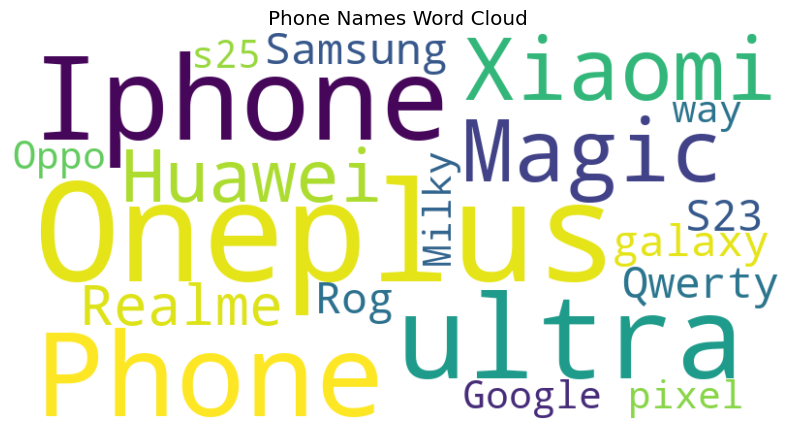

In [ ]:
import spacy
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Load spaCy's pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Predefined list of phone brands and models (expand this list as needed)
phone_brands_and_models = [
    "iphone", "samsung galaxy", "google pixel", "oneplus", "xiaomi", "realme", "oppo", "huawei", "sony xperia", 
    "rog phone", "s23 ultra", "galaxy s21", "iphone 13", "iphone", "samsung note 20", "samsung s20", "iphone 12"
]

# Function to extract phone names using NER and regex
def extract_phone_names_ner_and_regex(descriptions, phone_brands_and_models):
    phone_names = []
    
    for desc in descriptions:
        # Apply spaCy NLP pipeline to the description
        doc = nlp(desc)
        
        # Extract entities recognized as 'PRODUCT' by spaCy
        for ent in doc.ents:
            if ent.label_ == "PRODUCT":  # We check for product names/entities
                phone_names.append(ent.text.lower())

        # Regex filtering for known phone brands and models
        for brand_model in phone_brands_and_models:
            matches = re.findall(r'\b' + re.escape(brand_model) + r'\b', desc.lower())
            phone_names.extend(matches)
    
    return list(set(phone_names))  # Remove duplicates

# Assuming 'df' is your DataFrame with a 'Description' column
descriptions = df['Description'].tolist()

# Extract phone names from descriptions using NER and regex
phone_names = extract_phone_names_ner_and_regex(descriptions, phone_brands_and_models)

# Display the extracted phone names
print("Extracted Phone Names:")
for phone in phone_names:
    print(phone.capitalize())

phone_names_str = ' '.join(phone_names)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phone_names_str)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Phone Names Word Cloud')
plt.show()


In [4]:
# Perform sentiment analysis
def analyze_sentiment(descriptions):
    sentiments = []
    for desc in descriptions:
        blob = TextBlob(desc)
        sentiment = blob.sentiment.polarity  # Returns a polarity score
        sentiments.append(sentiment)
    return sentiments

sentiments = analyze_sentiment(descriptions)
df['Sentiment'] = sentiments

# Display sentiment analysis results
print("Sentiment analysis results (first 10 entries):")
print(df[['Rank', 'Title', 'Sentiment']].head(10))



Sentiment analysis results (first 10 entries):
   Rank                                              Title  Sentiment
0     1  What phone are you most excited about in 2025 ...   1.000000
1     2  Best phones 2025 tested — January top picks | ...   0.012121
2     3             The best phones to buy in 2025 | ZDNET   0.545455
3     4                   The Best Phones for 2025 | PCMag   0.800000
4     5                  Best Phone to Buy for 2025 - CNET   0.900000
5     6  The best phone 2025: top smartphones in the US...   0.233333
6     7  The best smartphones of 2025, tried and tested...   0.833333
7     8  The iPhone 17, Galaxy S25 and Other New Phones...   0.500000
8     9  Best upcoming phones for 2025: find your next ...   0.500000
9    10  The Best Smartphones for 2025 | Reviews by Wir...   0.231250


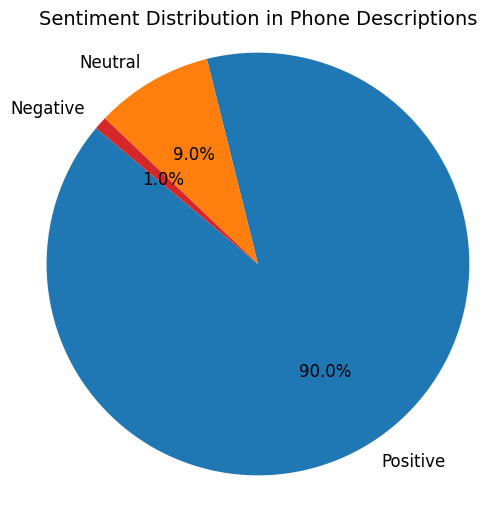

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from textblob import TextBlob
import numpy as np

# Ensure proper display of fonts in plots
plt.rcParams.update({'font.size': 12})

### **Step 1: Improved Phone Name Frequency Analysis (Bar Chart)**

# Count frequency of individual phone names
phone_counts = Counter(phone_names)

# Sort by frequency
sorted_phone_counts = dict(sorted(phone_counts.items(), key=lambda x: x[1], reverse=True))

# Generate colors for bars (gradient effect)
num_bars = len(sorted_phone_counts)
colors = plt.cm.viridis(np.linspace(0.2, 1, num_bars))  # Gradient colors


### **Step 2: Enhanced Sentiment Distribution Pie Chart (with Better Colors)**

# Function to analyze sentiment
def analyze_sentiment(descriptions):
    sentiments = []
    for desc in descriptions:
        blob = TextBlob(desc)
        sentiment = blob.sentiment.polarity  # Sentiment polarity score (-1 to +1)
        sentiments.append(sentiment)
    return sentiments

# Perform sentiment analysis on descriptions
df['Sentiment'] = analyze_sentiment(df['Description'])

# Categorize sentiment as Positive, Neutral, or Negative
df['Sentiment_Label'] = df['Sentiment'].apply(lambda s: 'Positive' if s > 0 else ('Negative' if s < 0 else 'Neutral'))

# Count sentiment categories
sentiment_counts = df['Sentiment_Label'].value_counts()

# Define better colors for pie chart
sentiment_colors = {'Positive': '#1f77b4', 'Negative': '#d62728', 'Neutral': '#ff7f0e'}  # Blue, Red, Orange

# Plot sentiment distribution with improved colors
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=[sentiment_colors[label] for label in sentiment_counts.index], textprops={'fontsize': 12})
plt.title("Sentiment Distribution in Phone Descriptions", fontsize=14)
plt.axis('equal')  # Ensures a perfect circle
plt.show()


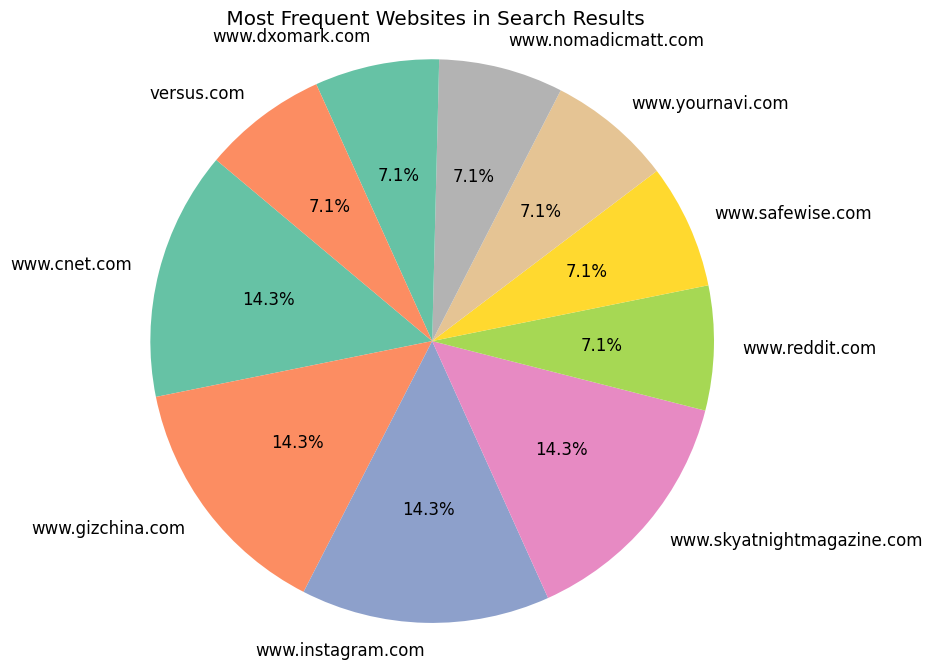

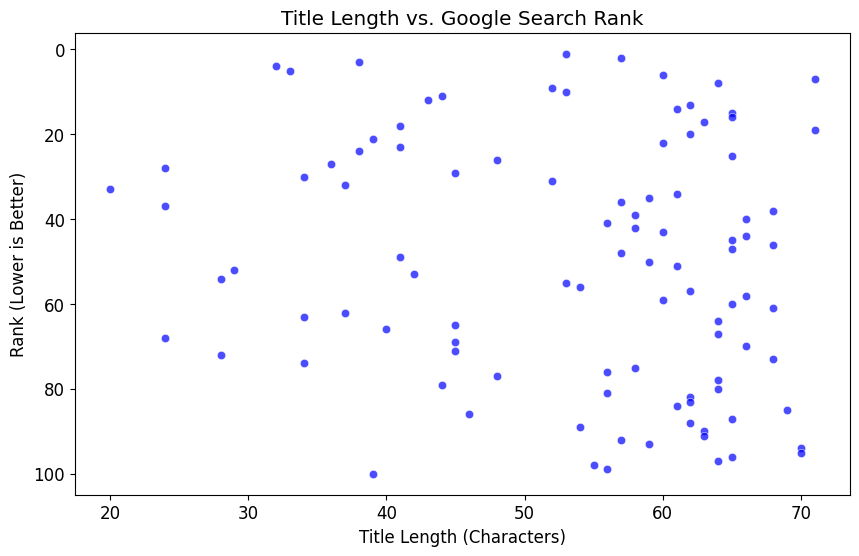

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

import urllib.parse

### **1️⃣ Word Frequency in Titles (Bar Chart & Word Cloud)**
# Extract words from titles
title_words = " ".join(df["Title"]).lower().split()
common_words = Counter(title_words)

# Remove stopwords (like "the", "and", "for", etc.)

### **2️⃣ Domain Analysis (Pie Chart of Most Frequent Websites)**
# Extract domains from URLs
df["Domain"] = df["URL"].apply(lambda x: urllib.parse.urlparse(x).netloc)

# Count the most frequent domains
domain_counts = df["Domain"].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title(" Most Frequent Websites in Search Results")
plt.axis('equal')  
plt.show()



### **3️⃣ Title Length vs. Rank (Scatter Plot)**
df["Title Length"] = df["Title"].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Title Length", y="Rank", color="blue", alpha=0.7)
plt.title("Title Length vs. Google Search Rank")
plt.xlabel("Title Length (Characters)")
plt.ylabel("Rank (Lower is Better)")
plt.gca().invert_yaxis()  # Rank 1 should be at the top
plt.show()


### **4️⃣ URL Structure Analysis (Top-Level Domains & Path Extraction)**
# Extract TLD (like .com, .org, .net) from domains




In [7]:
corr = df[['Title Length', 'Rank']].corr()
print("Correlation between Title Length & Rank:\n", corr)


Correlation between Title Length & Rank:
               Title Length      Rank
Title Length      1.000000  0.174199
Rank              0.174199  1.000000


In [8]:
df['URL Length'] = df['URL'].apply(len)

# Correlation between URL length and rank
corr_url = df[['URL Length', 'Rank']].corr()
print("Correlation between URL Length & Rank:\n", corr_url)


Correlation between URL Length & Rank:
             URL Length      Rank
URL Length    1.000000  0.338434
Rank          0.338434  1.000000


In [9]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Extract features from Title & URL
df['Title Length'] = df['Title'].apply(lambda x: len(str(x)))
df['URL Length'] = df['URL'].apply(lambda x: len(str(x)))

# Compute keyword frequency in title
def keyword_count(text):
    keywords = ["best", "review", "smartphone", "buy", "2025", "top", "cheap", "flagship"]
    return sum(1 for word in text.lower().split() if word in keywords)

df['Keyword Count'] = df['Title'].apply(keyword_count)

# Selecting features & target variable
features = ['Title Length', 'URL Length', 'Keyword Count', 'Sentiment']
X = df[features]
y = df['Rank']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
# Calculate Mean Absolute Error & R² Score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 22.51
R² Score: 0.12


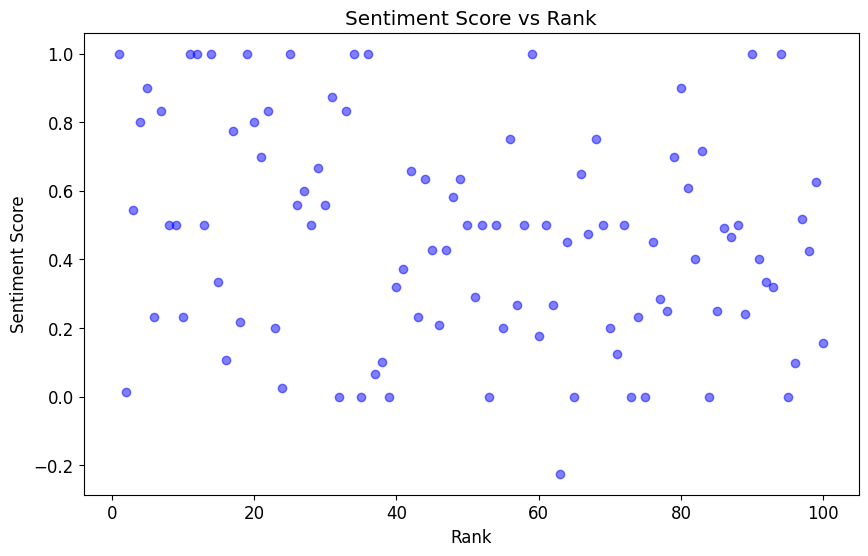

In [11]:
from textblob import TextBlob

# Function to analyze sentiment of descriptions
def analyze_sentiment(descriptions):
    sentiments = []
    for desc in descriptions:
        blob = TextBlob(desc)
        sentiment = blob.sentiment.polarity  # Returns a polarity score
        sentiments.append(sentiment)
    return sentiments

# Sentiment analysis of descriptions
df['Sentiment'] = analyze_sentiment(df['Description'])

# Plot sentiment trends over rank
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Sentiment'], c='blue', alpha=0.5)
plt.title('Sentiment Score vs Rank')
plt.xlabel('Rank')
plt.ylabel('Sentiment Score')
plt.show()


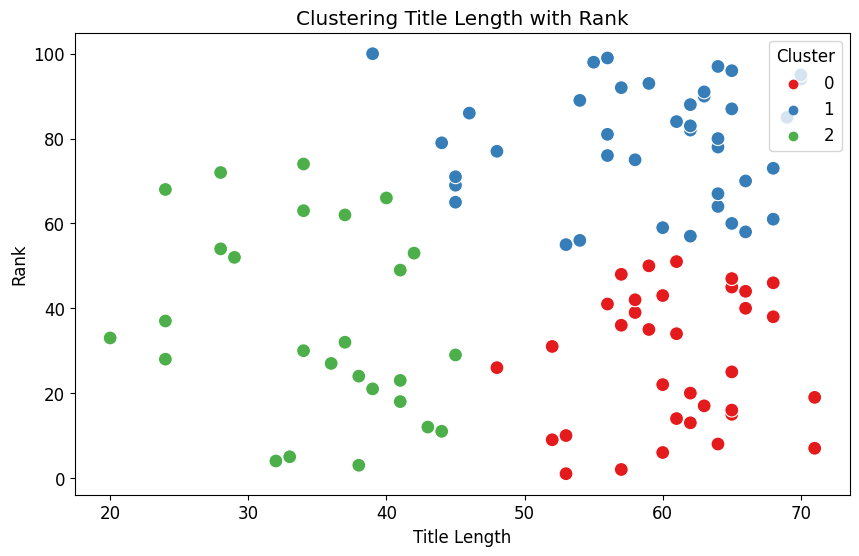

               count       mean        std   min    25%   50%    75%    max
Title Cluster                                                              
0               34.0  27.647059  15.778548   1.0  14.25  28.5  41.75   51.0
1               40.0  79.000000  13.683229  55.0  68.50  80.5  90.25  100.0
2               26.0  36.538462  22.353936   3.0  21.50  31.0  53.75   74.0


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering Title Length with Rank
df['Title Length'] = df['Title'].apply(len)
X_title_rank = df[['Title Length', 'Rank']]

# Standardizing the data
scaler = StandardScaler()
X_title_rank_scaled = scaler.fit_transform(X_title_rank)

# Apply KMeans clustering
kmeans_title_rank = KMeans(n_clusters=3, random_state=42,n_init=10)
df['Title Cluster'] = kmeans_title_rank.fit_predict(X_title_rank_scaled)

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Title Length'], y=df['Rank'], hue=df['Title Cluster'], palette='Set1', s=100)
plt.title("Clustering Title Length with Rank")
plt.xlabel("Title Length")
plt.ylabel("Rank")
plt.legend(title="Cluster", loc='upper right')
plt.show()

# Display cluster summary
print(df.groupby('Title Cluster')['Rank'].describe())


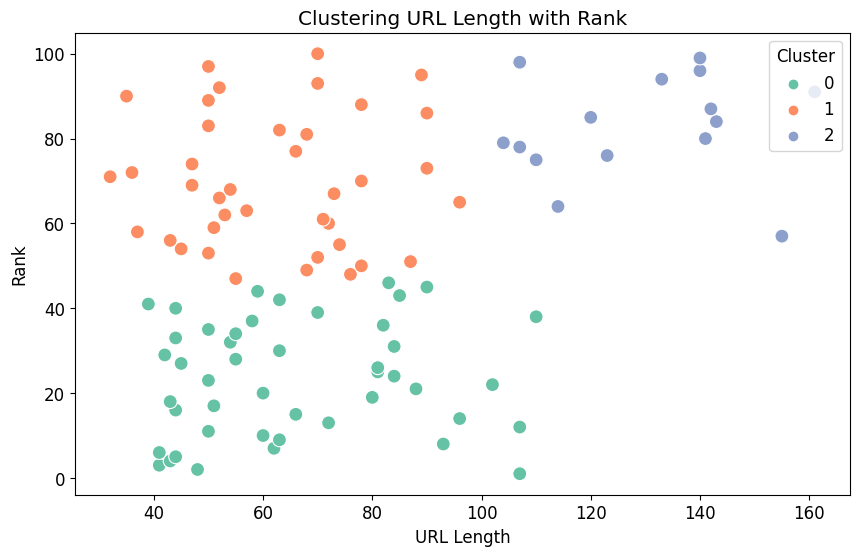

             count       mean        std   min    25%   50%    75%    max
URL Cluster                                                              
0             46.0  23.500000  13.422618   1.0  12.25  23.5  34.75   46.0
1             39.0  69.897436  15.593175  47.0  57.00  68.0  82.50  100.0
2             15.0  82.866667  12.117677  57.0  77.00  84.0  92.50   99.0


In [19]:
# Clustering URL Length with Rank
df['URL Length'] = df['URL'].apply(len)
X_url_rank = df[['URL Length', 'Rank']]

# Standardizing the data
X_url_rank_scaled = scaler.fit_transform(X_url_rank)

# Apply KMeans clustering
kmeans_url_rank = KMeans(n_clusters=3, random_state=42,n_init=10)
df['URL Cluster'] = kmeans_url_rank.fit_predict(X_url_rank_scaled)

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['URL Length'], y=df['Rank'], hue=df['URL Cluster'], palette='Set2', s=100)
plt.title("Clustering URL Length with Rank")
plt.xlabel("URL Length")
plt.ylabel("Rank")
plt.legend(title="Cluster", loc='upper right')
plt.show()

# Display cluster summary
print(df.groupby('URL Cluster')['Rank'].describe())


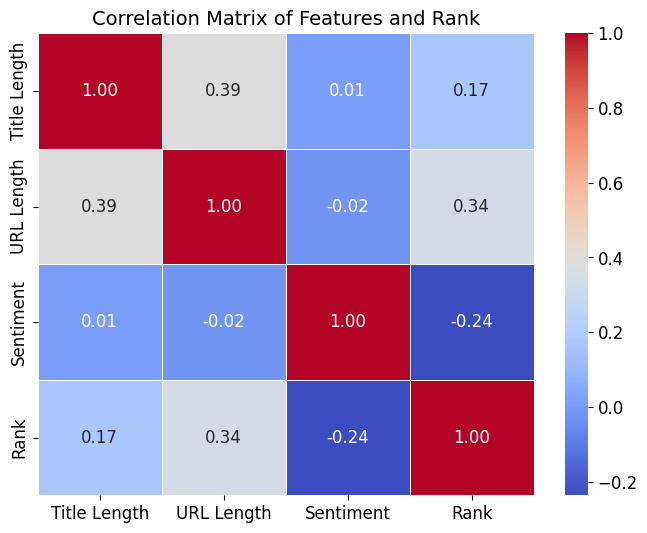

In [13]:
# Check correlations between features and rank
correlation_matrix = df[['Title Length', 'URL Length', 'Sentiment', 'Rank']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features and Rank", fontsize=14)
plt.show()


In [14]:
correlation_matrix = df[['Title Length', 'URL Length', 'Sentiment', 'Rank']].corr()
print(correlation_matrix)


              Title Length  URL Length  Sentiment      Rank
Title Length      1.000000    0.386256   0.008547  0.174199
URL Length        0.386256    1.000000  -0.023669  0.338434
Sentiment         0.008547   -0.023669   1.000000 -0.236574
Rank              0.174199    0.338434  -0.236574  1.000000


In [15]:
    # Function to count proper words in URL
def count_proper_words(url):
        words = re.findall(r'[a-zA-Z]+', str(url))  # Extract words only
        return len(words)

df['Num_Words_in_URL'] = df['URL'].apply(count_proper_words)

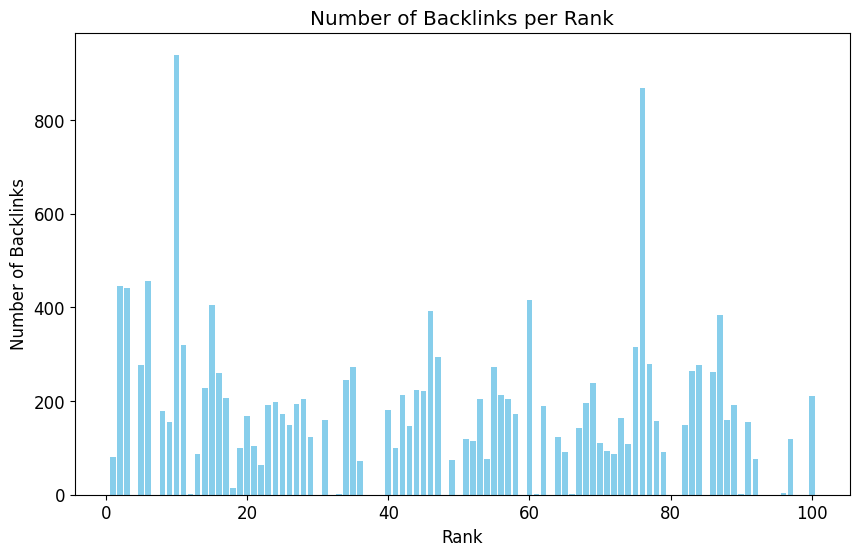

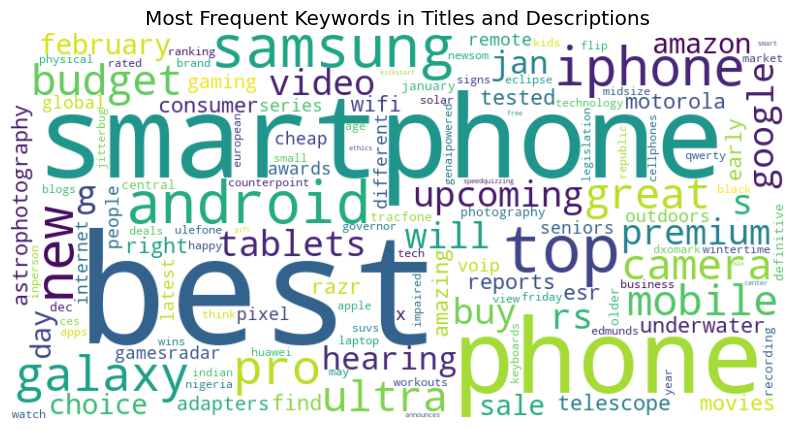

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def get_keywords_from_url(url, title, description):
    # Combine Title and Description for keyword analysis
    text = title + ' ' + description
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

    # Count word frequencies
    word_counts = Counter(text.split())
    
    # Return the top 5 keywords
    return ', '.join([word for word, count in word_counts.most_common(5)])

# Function to count number of links (backlinks proxy)
def count_links(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Count the number of <a> tags
        links = soup.find_all('a')
        return len(links)  # Count number of links
    except requests.exceptions.RequestException:
        return 0

# Apply the functions to the DataFrame
df['Keywords'] = df.apply(lambda row: get_keywords_from_url(row['URL'], row['Title'], row['Description']), axis=1)
df['Backlinks'] = df['URL'].apply(count_links)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_file.csv', index=False)

# Display the updated DataFrame


# Graph 1: Bar Graph for Backlinks
plt.figure(figsize=(10, 6))
plt.bar(df['Rank'], df['Backlinks'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Number of Backlinks')
plt.title('Number of Backlinks per Rank')
plt.show()

# Graph 2: Word Cloud for Keywords (from all URLs)
# Combine all keywords
all_keywords = ' '.join(df['Keywords'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Keywords in Titles and Descriptions')
plt.show()